<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

#### This notebook summarizes the workflow of data visualization in Python. It is made by and summarized by yuka_with_data. The content is a summary of IBM's Python Data Science Course.

## Required Libraries<a class="anchor" id="first"></a>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # ggplot-like style

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # ggplot-like style

## Download Sample Data

In [ ]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe')

`%matplotlib inline`


## Data Properties

In [ ]:
# overview
df_can.head() # tail() for the last 5 rows

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# short summary of df
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [ ]:
# df columns instance variables
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [ ]:
# a list of indices
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [ ]:
# geometry (shape) of df_can
df_can.shape

(195, 43)

In [ ]:
type(df_can.index.tolist())
type(df_can.columns.tolist())

list

## Data Wrangling

Remove columns that are not useful + Rename remaining columns that carry non-numerical variable

In [ ]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.columns


Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

In [ ]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent', 'RegName':'Region'}, inplace = True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [ ]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Add a new column 'Total' for culmulative population data

In [ ]:
# create new column Total
df_can['Total'] = df_can.sum(axis=1)

C:\Users\yukam\AppData\Local\Temp\ipykernel_27328\2444608462.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


Run an inspection to detect null objects

In [ ]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Summary Statistics

In [ ]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


### Indexing and Slicing

#### Select Columns

In [ ]:
df_can['Country'] # returns series
df_can[['Country','Continent']] # returns dataframe

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe
...,...,...
190,Viet Nam,Asia
191,Western Sahara,Africa
192,Yemen,Asia
193,Zambia,Africa


In [ ]:
df_can[['Country',1980,2013]]

,Country,1980,2013
0,Afghanistan,16,2004
1,Albania,1,603
2,Algeria,80,4331
3,American Samoa,0,0
4,Andorra,0,1
...,...,...,...
190,Viet Nam,1191,2112
191,Western Sahara,0,0
192,Yemen,1,217
193,Zambia,11,59


#### Select Rows

`df.loc[label]` filters by the labels of the index/column \
`df.iloc[index]` filters by the positions of the index/column

Convert Index from numeric range to 'Country'

In [ ]:
df_can.set_index('Country', inplace=True)

In [ ]:
# new dataframe with index = Country
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Access rows using `loc` and `iloc`

In [ ]:
# access row data, Country = 'Japan'
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [ ]:
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

In [ ]:
df_can.iloc[190,20]

1752

In [ ]:
df_can.iloc[190,[4,5,6]]

1981    1829
1982    2162
1983    3404
Name: Viet Nam, dtype: object

**[Years]** Convert all column names into String + Create `Years` object to prepare for Time Series.

In [ ]:
df_can.columns = list(map(str, df_can.columns))

In [ ]:
years = list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

#### Filtering based on conditions

Filter the main dataframe with a condition of Continent = Europe

In [ ]:
# create a conditioning boolean series
euro = df_can['Continent'] == 'Europe'


In [ ]:
# pass the condition euro into the main dataframe
df_can[euro]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Austria,Europe,Western Europe,Developed regions,234,238,201,117,127,165,196,...,122,102,98,91,109,124,84,102,90,4985
Belarus,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,558,439,568,524,454,438,357,277,247,7975
Belgium,Europe,Western Europe,Developed regions,511,540,519,297,183,181,197,...,400,302,363,335,358,363,332,402,379,10762
Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
Bulgaria,Europe,Eastern Europe,Developed regions,24,20,12,33,11,24,33,...,1738,1419,1172,994,784,556,365,451,512,23310
Croatia,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,128,102,102,131,92,91,135,112,125,8001
Czech Republic,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,193,146,137,104,159,168,128,173,174,4192


Pass multiple conditions 

In [ ]:
# pass 2 conditions: Continent = Europe & Region = Southern Europe
df_can[(df_can['Continent'] == 'Europe') & (df_can['Region'] == 'Southern Europe')]
# use () for each conditions, then df[]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
Croatia,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,128,102,102,131,92,91,135,112,125,8001
Greece,Europe,Southern Europe,Developed regions,1065,953,897,633,580,584,547,...,100,74,110,107,119,101,102,146,298,12410
Italy,Europe,Southern Europe,Developed regions,1820,2057,1480,820,858,667,731,...,344,325,320,370,429,434,374,440,545,22624
Malta,Europe,Southern Europe,Developed regions,191,242,153,64,60,68,76,...,28,24,7,21,18,17,8,9,4,1546
Montenegro,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,0,0,7,19,10,14,19,26,9,105
Portugal,Europe,Southern Europe,Developed regions,4473,3486,2432,1433,1398,1451,2617,...,338,424,405,665,623,629,528,560,630,74167


In [ ]:
df_south_euro = df_can[(df_can['Continent'] == 'Europe') & (df_can['Region'] == 'Southern Europe')]


**Inspect final dataframe before data visualization**

In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
df_can.shape

(195, 38)

In [ ]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

## Data Visualization

(Loaded Matplotlip.Pyplot)

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
# Apply a ggplot style -optional
mpl.style.use(['ggplot'])

### Plot Function

Use the case study of Haiti

In [ ]:
# Extract Haiti variable
haiti = df_can.loc['Haiti', years]

In [ ]:
# change index values from str to int
haiti.index = haiti.index.map(int)

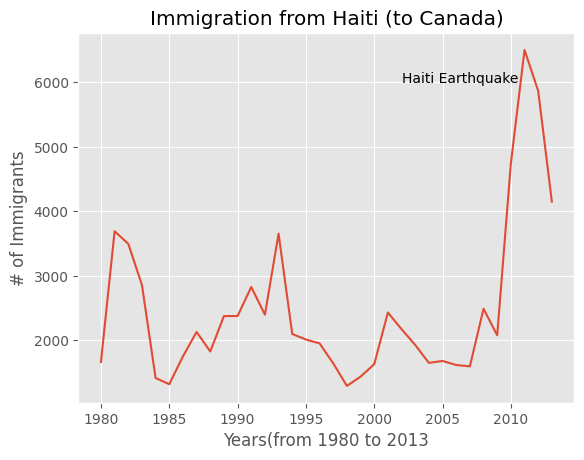

In [ ]:
# run plot function
haiti.plot(kind='line') 
# add title, labels and annotations
plt.title('Immigration from Haiti (to Canada)')
plt.xlabel('Years(from 1980 to 2013')
plt.ylabel('# of Immigrants')
plt.text(2002,6000,'Haiti Earthquake')

plt.show()


#### Creating India and Pakistan combined plot

In [ ]:
df_ip = df_can.loc[['India','Pakistan'],years]
df_ip

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


Transpose the dataframe to flip year and country

In [ ]:
df_ip = df_ip.transpose()
df_ip.head()

Country,India,Pakistan
1980,8880,978
1981,8670,972
1982,8147,1201
1983,7338,900
1984,5704,668


Change the index value from str to integer

In [ ]:
# change the index value from str to integer
df_ip.index = df_ip.index.map(int)

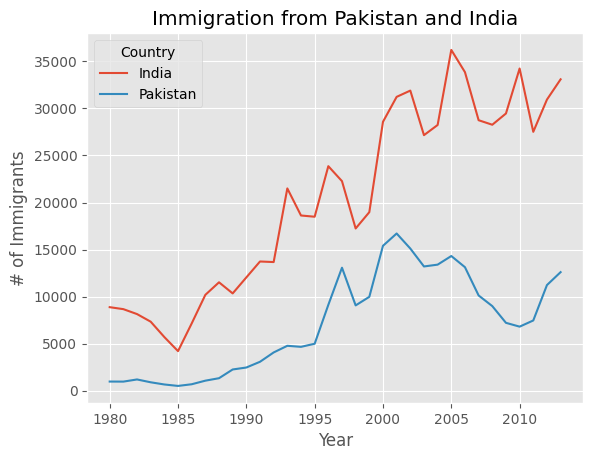

In [ ]:
# plotting
df_ip.plot(kind='line')
# adding title, label and annotation
plt.title('Immigration from Pakistan and India')
plt.xlabel('Year')
plt.ylabel('# of Immigrants')

plt.show()


#### Creating Plots for Top 5 Countries

First re-order the main data by 'Total' descending order. Then extract top 5.

In [ ]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


To flip the year and the country, use `transpose` function.

In [ ]:
df_top5 = df_top5[years].transpose()
print(df_top5)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

Text(0.5, 0, 'Years')

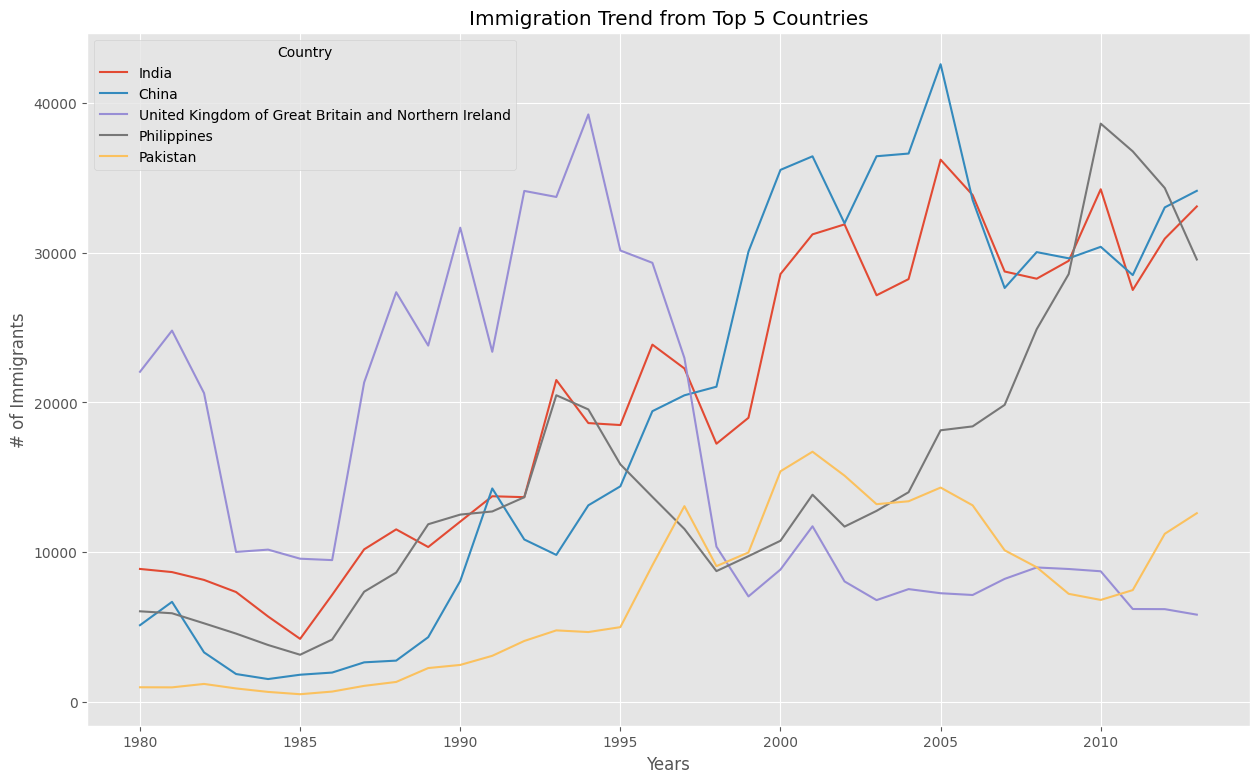

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line',figsize=(15,9))

plt.title('Immigration Trend from Top 5 Countries')
plt.ylabel('# of Immigrants')
plt.xlabel('Years')

## Plot Type: Area Plot

Set the parameter `kind='area'` to convert into Area plot. The area plot is stacked by default. NaN values will default to 0. For unstacked area plot, set the parameter `stacked=False`.

Text(0.5, 1.0, 'Stacked Area Plot as Default')

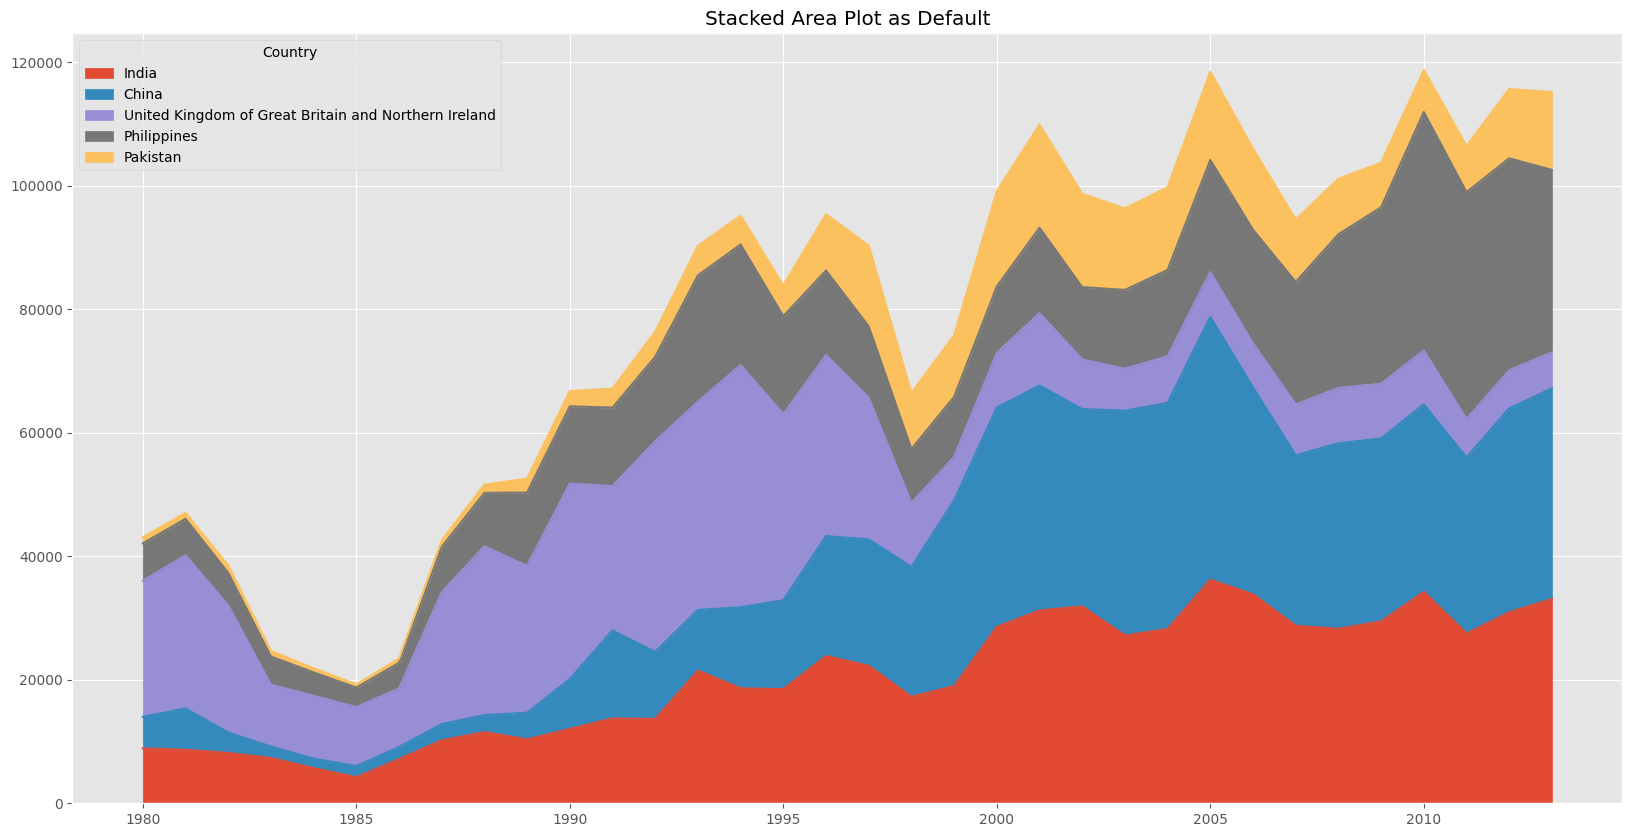

In [ ]:
# area plot is stacked by default
df_top5.plot(kind='area',figsize=(20,10))

plt.title('Stacked Area Plot as Default')

Unstack the area plot and change the alpha parameter to the value less than 1, so that the overlapping section is still easier to interpret. 

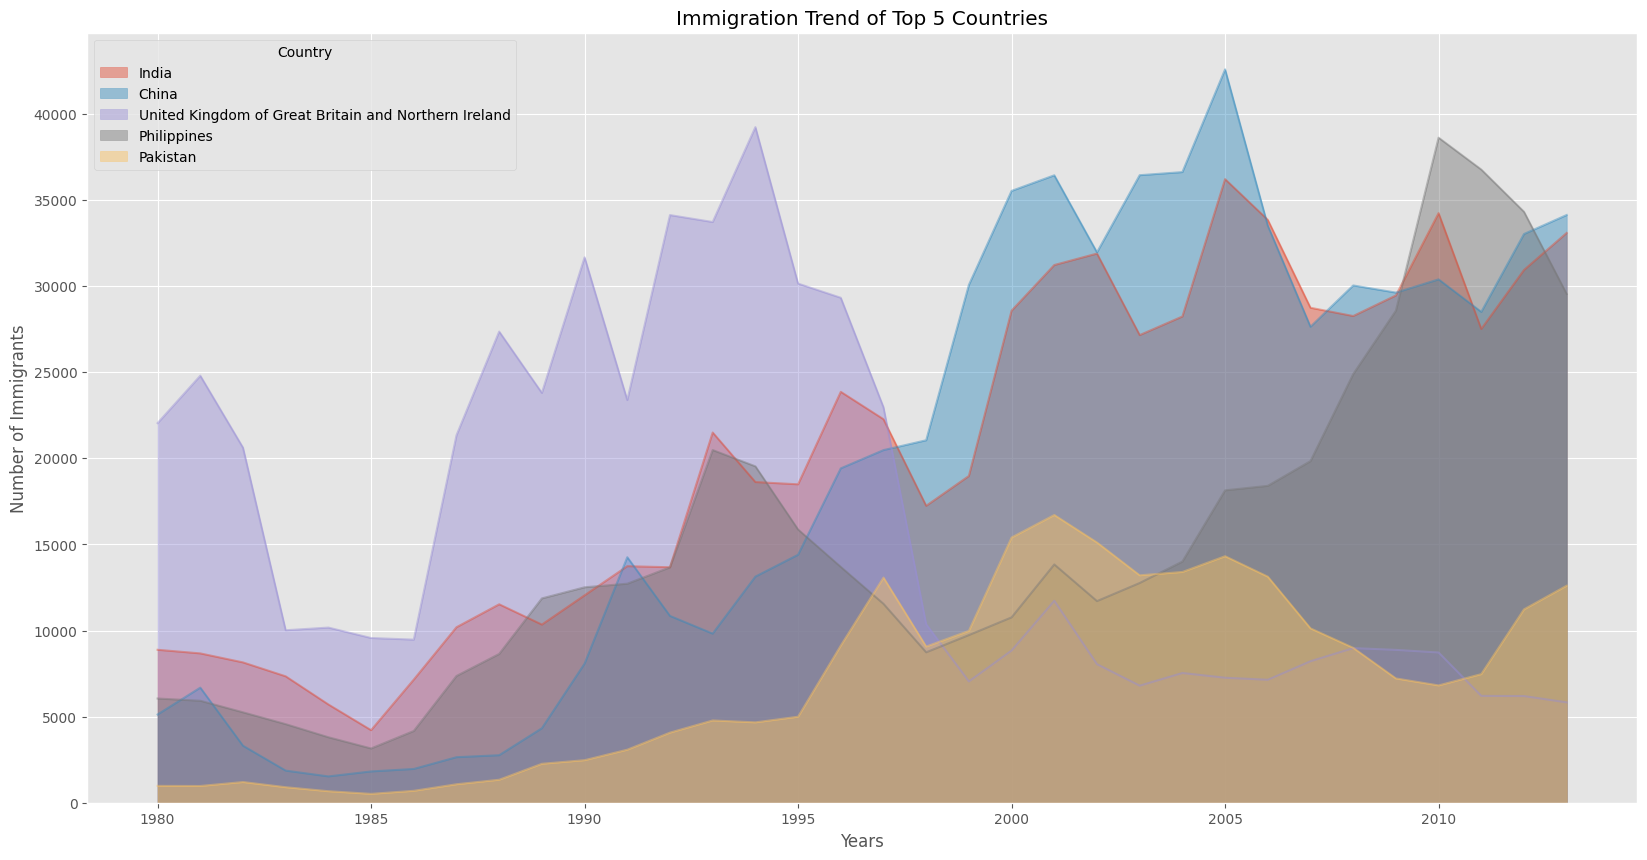

In [ ]:
# Unstacked area plot, stacked = False 
df_top5.index = df_top5.index.map(int) #change index values to type integer
df_top5.plot(kind='area',
             stacked=False,
             alpha=0.45, # transparancy
             figsize=(20, 10))  

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Creating Plots for The Least 5 Countries

In [ ]:
# tail() to extract the bottom 5 rows
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_bottom5 = df_can.tail(5)
df_bottom5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_bottom5 = df_bottom5[years].transpose()
# change the index value to from str to int
df_bottom5.index = df_bottom5.index.map(int)

### Scripting Layer vs. Artistic Layer

*Scripting Layer*: matplotlib.pyplot (procedual method)
Add multiple elements by using `plt.title(), plt.xlabel()`

*Artist Layer*: `Axes` instance from matplotlib (object oriented and advanced method)
Use `Axes` instance of current plot and store it in a variable.
Add multiple elements by using `ax.set_title(), ax.set_xlabel()`.


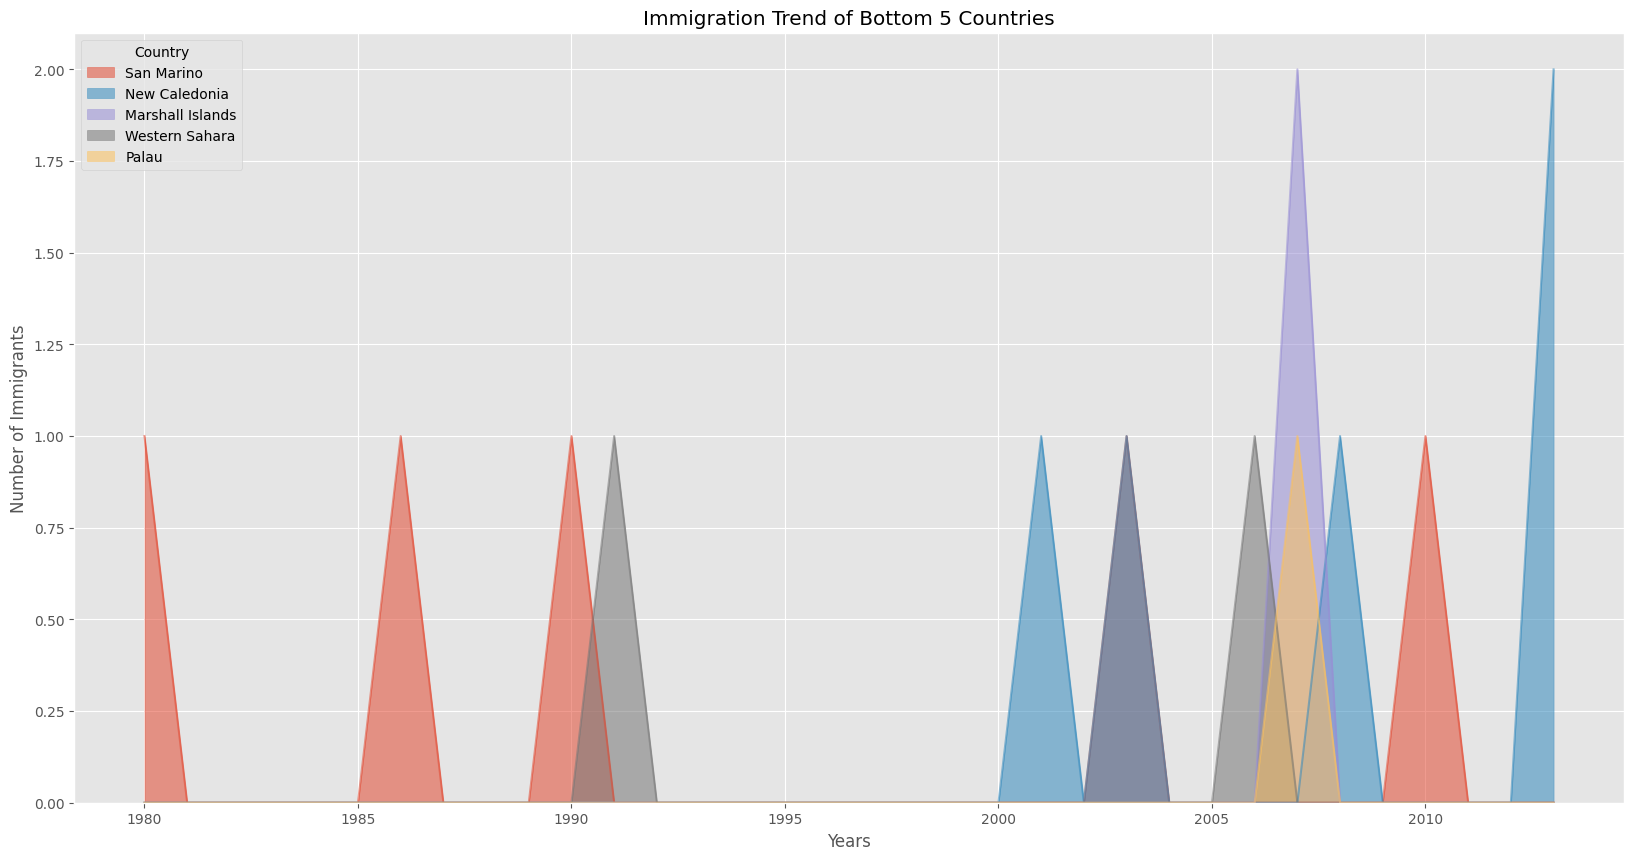

In [ ]:
# Scripting Layer
df_bottom5.plot(kind='area',
                stacked=False,
                alpha=0.55,
                figsize=(20, 10))

plt.title('Immigration Trend of Bottom 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0, 0.5, '# of Immigrants')

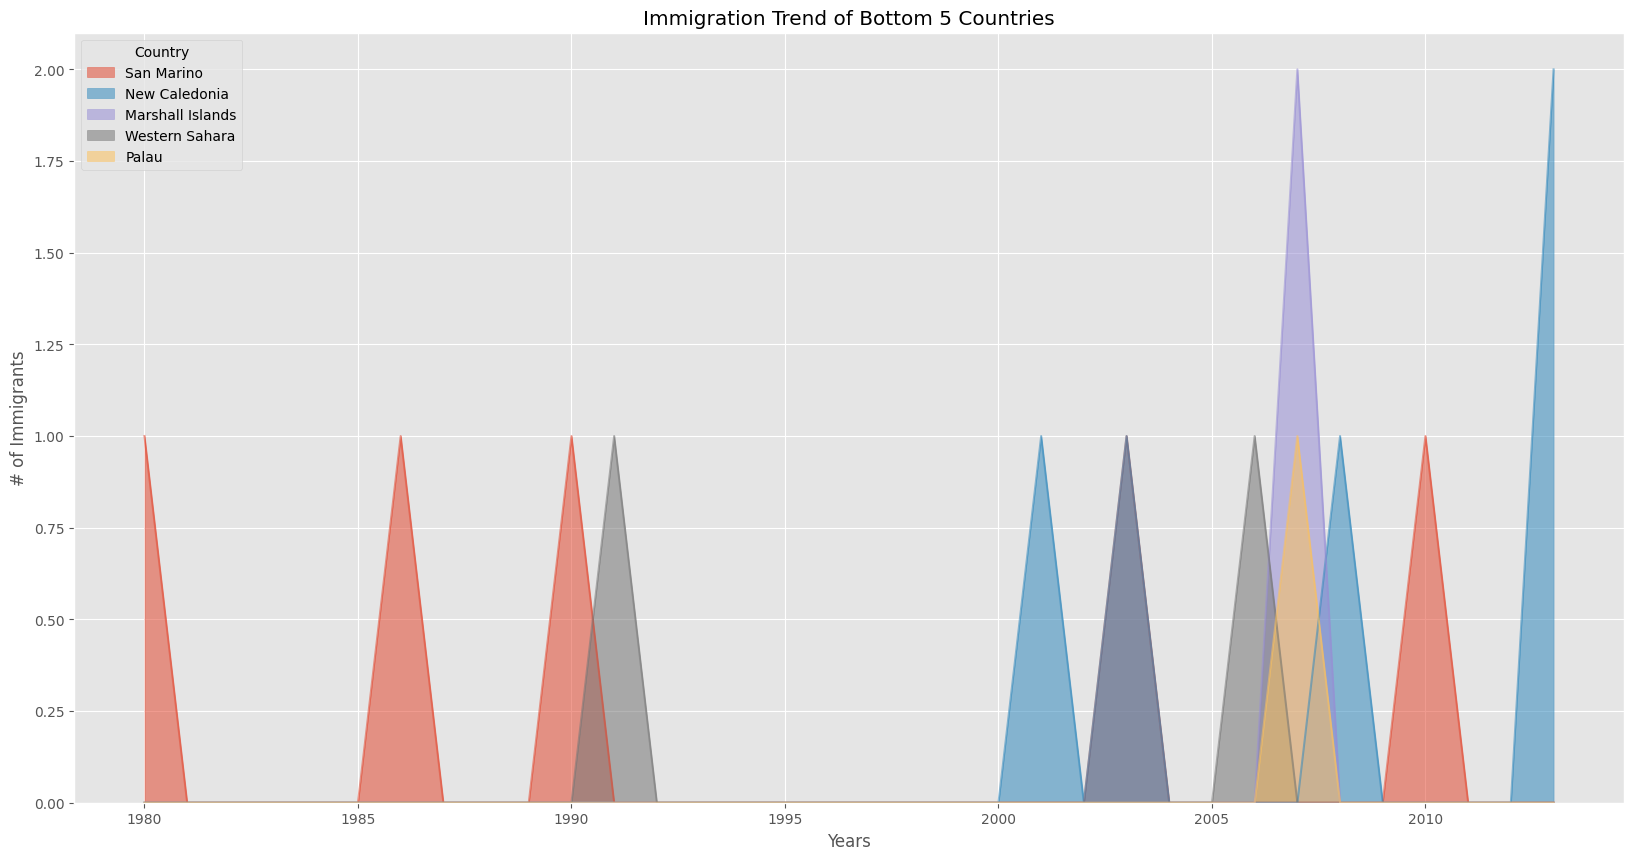

In [ ]:
# Artist Layer
art_plot = df_bottom5.plot(kind='area',
                stacked=False,
                alpha=0.55,
                figsize=(20, 10))

art_plot.set_title('Immigration Trend of Bottom 5 Countries')
art_plot.set_xlabel('Years')
art_plot.set_ylabel('# of Immigrants')


## Plot Type: Histograms

Create frequency distribution of the # of new immigrants during the year of 2000

In [ ]:
# extract data from 2000
df_can['2000'].head()

Country
India                                                   28572
China                                                   35529
United Kingdom of Great Britain and Northern Ireland     8840
Philippines                                             10763
Pakistan                                                15400
Name: 2000, dtype: int64

Use Numpy's `histogram` function to get the bin ranges and freq counts

In [ ]:
count, bin_edges = np.histogram(df_can['2000'])

Pass `xticks` keyward that contains the list of the bin sizes.

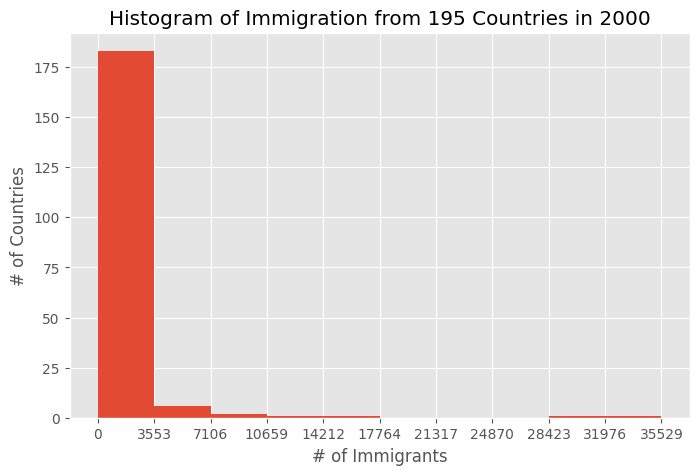

In [ ]:
# plot histogram for the year 2000 
df_can['2000'].plot(kind='hist',figsize=(8,5),xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2000')
plt.xlabel('# of Immigrants')
plt.ylabel('# of Countries')

plt.show()


#### Multiple Histograms on The Same Plot

*Denmark, Norway, and Sweden Example*

In [ ]:
#.loc to extract countries + plot + hist
df_dns = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_dns.head()


Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [ ]:
# bin ranges and freq counts = xticks
count, bin_edges=np.histogram(df_dns,15)

In [ ]:
print(count)
print(bin_edges)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ]


<AxesSubplot: ylabel='Frequency'>

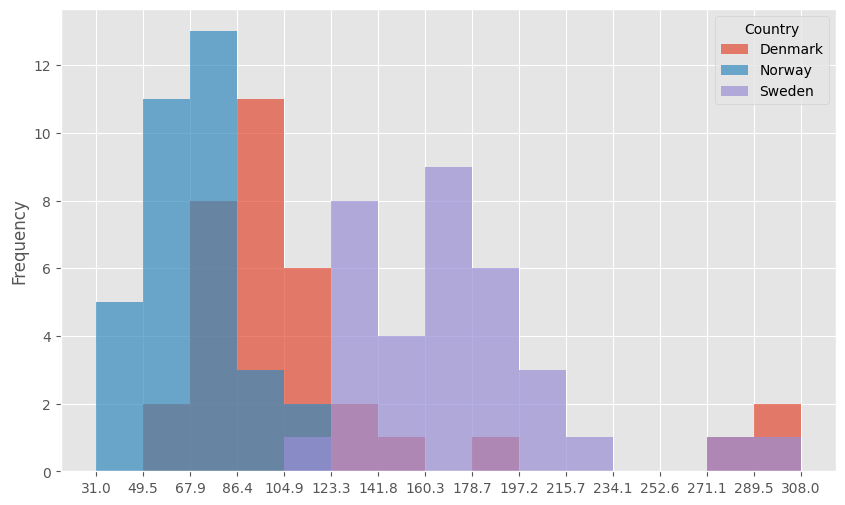

In [ ]:
df_dns.plot(kind='hist',bins=15,xticks=bin_edges,alpha=0.70,figsize=(10,6))


*Greece, Albania and Bulgaria Example*

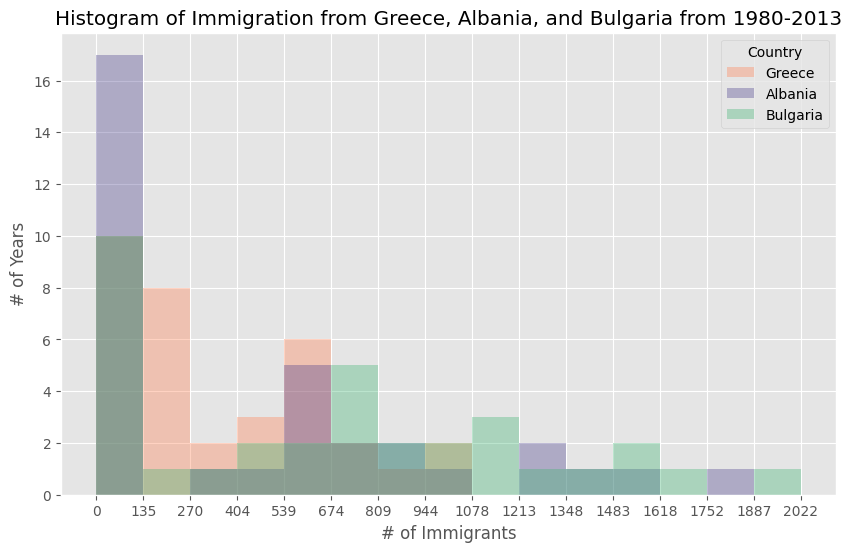

In [ ]:
from turtle import color
# extract 3 countries for years, transpose
df_gab_t = df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()
# bin ranges and freq counts = xticks
count, bin_edges = np.histogram(df_gab_t,15)
# hist plot
df_gab_t.plot(kind='hist',
              figsize=(10,6),
              bins=15,
              xticks=bin_edges,
              alpha=0.35,
              color=['coral', 'darkslateblue', 'mediumseagreen']
              )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980-2013')
plt.xlabel('# of Immigrants')
plt.ylabel('# of Years')

plt.show()

Plot Type: Bar Chart

`kind = bar`: a vertical bar plot \
`kind = barh`: a horizontal bar plot

In [ ]:
# extract Iceland/years data
df_ice = df_can.loc['Iceland',years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

<AxesSubplot: >

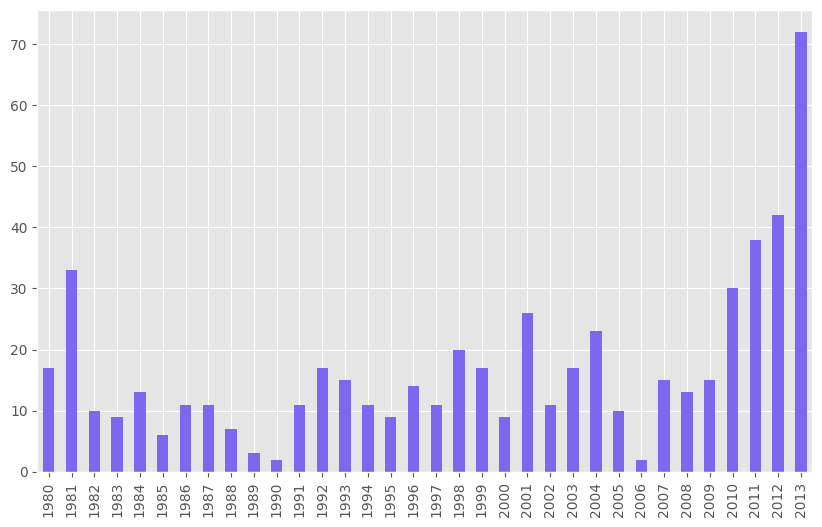

In [ ]:
df_ice.plot(kind='bar',figsize=(10,6),color='MediumSlateBlue')

### Annotation

Add annotation to the bar plot above using `annotate` function from pyplot (arrow and text).

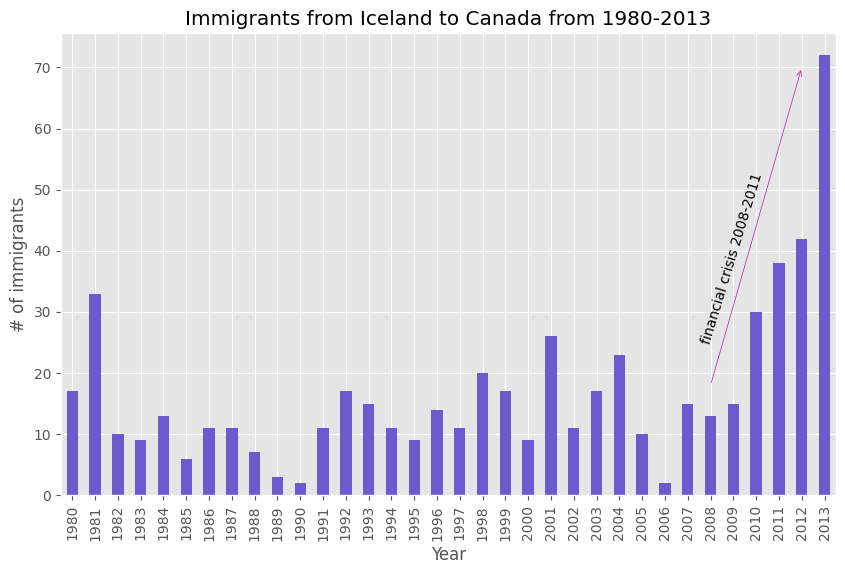

In [ ]:
df_ice.plot(kind='bar',figsize=(10,6),color='SlateBlue')

plt.title('Immigrants from Iceland to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('# of immigrants')

# Annotation - Arrow
plt.annotate('', #str
             xy=(32,70), # head of the arrow at point
             xytext=(28,18), # base of the arrow at point
             xycoords='data',
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='mediumvioletred')
             )

# Annotation - Text
plt.annotate('financial crisis 2008-2011', #str to display
             xy=(27.5,25), # start of the text
             rotation=73
             ) 

plt.show()


## Plot Type: Pie Chart

Use `groupby` method to summarize the data by `Continent` to prep for Pie Chat visualization.\
`groupby` involves splitting the data into groups, apply the function (sum, mean, std, etc...), then Combine the results of aggregation. 

In [ ]:
# groupby Continent and sum
df_cont = df_can.groupby('Continent',axis=0).sum()
df_cont

C:\Users\yukam\AppData\Local\Temp\ipykernel_27328\27192262.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cont = df_can.groupby('Continent',axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Create a pie chart with `kind='pie'` parameter. \
Set colors, Use explode_list to highlight slices that are smaller.

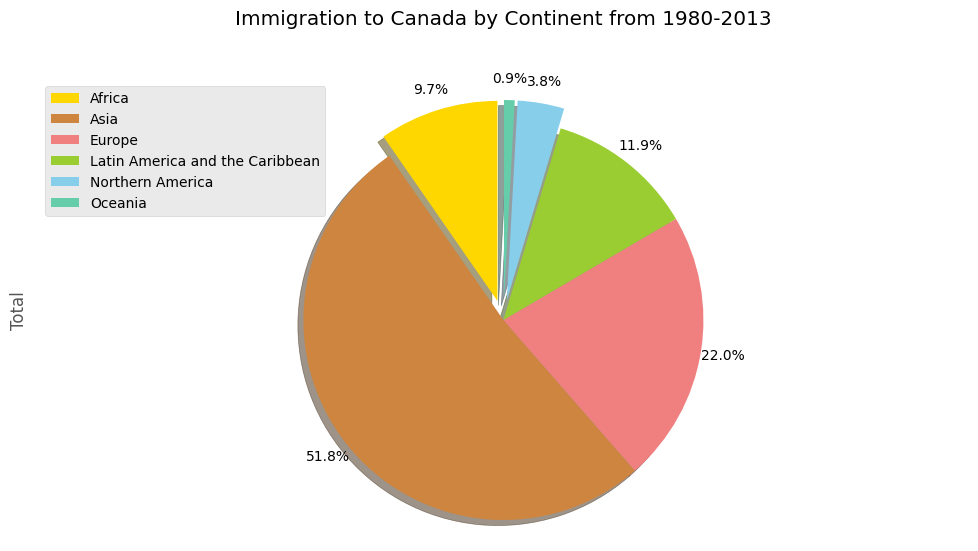

In [ ]:
# pie chart for Total
explode_list = [0.1,0,0,0,0.1,0.1] # explode ratio
color_list = ['gold','peru','lightcoral','yellowgreen','skyblue','mediumaquamarine']

df_cont['Total'].plot(kind='pie',
                      figsize=(12,6),
                      autopct='%1.1f%%', # display %
                      startangle=90, # start angle at 90 degrees
                      shadow=True, # add 3D
                      labels=None, # No label (add legend later)
                      pctdistance=1.11, # the ratio between the center and the start of the text
                      explode=explode_list, # the ratio of wadge offset
                      colors=color_list
                      )

plt.title('Immigration to Canada by Continent from 1980-2013',y=1.1)
plt.axis('equal') # set a circle
plt.legend(labels=df_cont.index,loc='upper left')  # label is set as an index for df_cont

plt.show()

## Plot Type: Box Plot

**Five Dimentions of Statistical Representation**

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="center">

#### EX) Compare the distribution of the # of new immigrants from India and China from 1980-2013.

In [ ]:
df_ci = df_can.loc[['China','India'],years].transpose()
df_ci

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


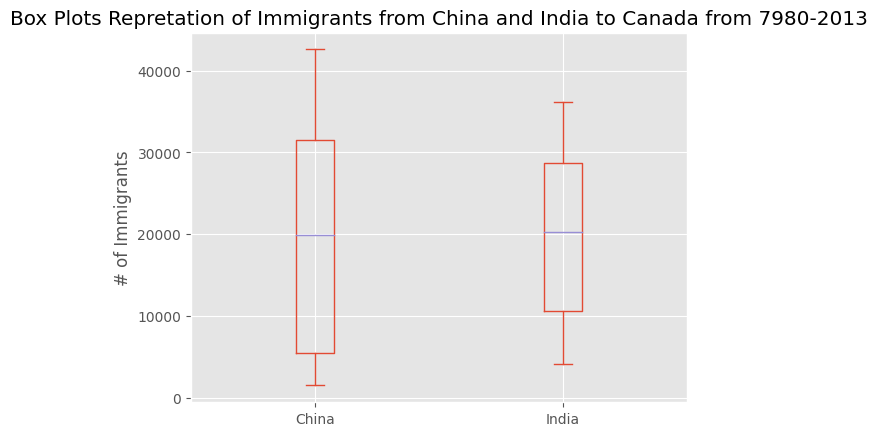

In [ ]:
# plot
df_ci.plot(kind='box')

plt.title('Box Plots Repretation of Immigrants from China and India to Canada from 7980-2013')
plt.ylabel('# of Immigrants')

plt.show()

Extract the percentile information for both China and India.

In [ ]:
df_ci.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


To create a horizontal box plots, pass the `vert` parameter in the plot function and assign it to *False*. 

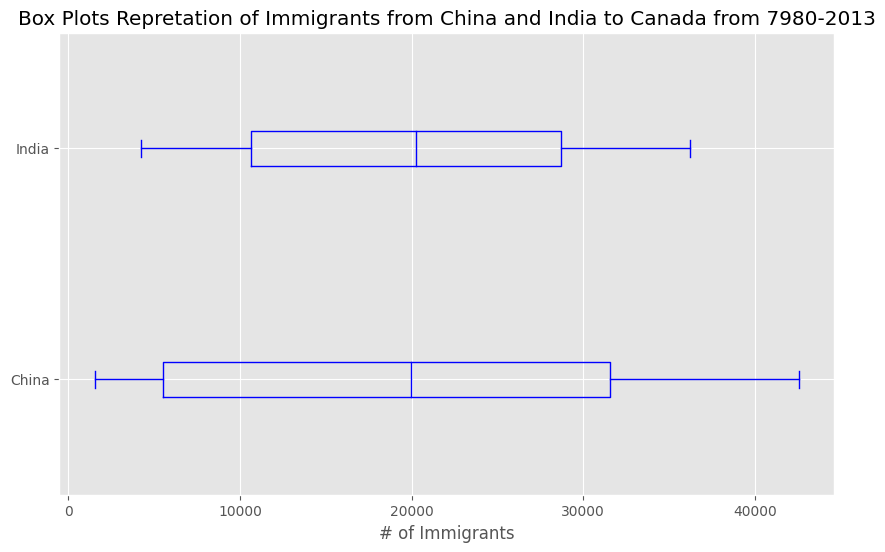

In [ ]:
df_ci.plot(kind='box',figsize=(10,6),color='blue',vert=False)

plt.title('Box Plots Repretation of Immigrants from China and India to Canada from 7980-2013')
plt.xlabel('# of Immigrants')

plt.show()

### Subplot

To visualize multiple plots together, create a `figure` object and divide it into `subplots` that each containing a plot. Use **Artist Layer** instead of scripting layer. 

Syntax: \
fig = plt.figure() \
ax = fig.add_subplot(nrows, ncols, plot_number)

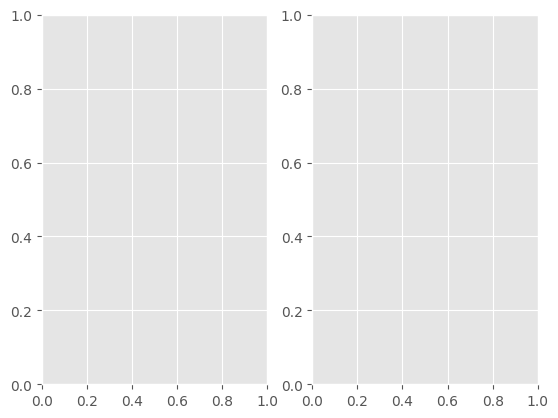

In [ ]:
# activate Subplot
fig = plt.figure() # create a figure

ax0 = fig.add_subplot(1,2,1) # subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # subplot 2 (1 row, 2 columns, second plot)

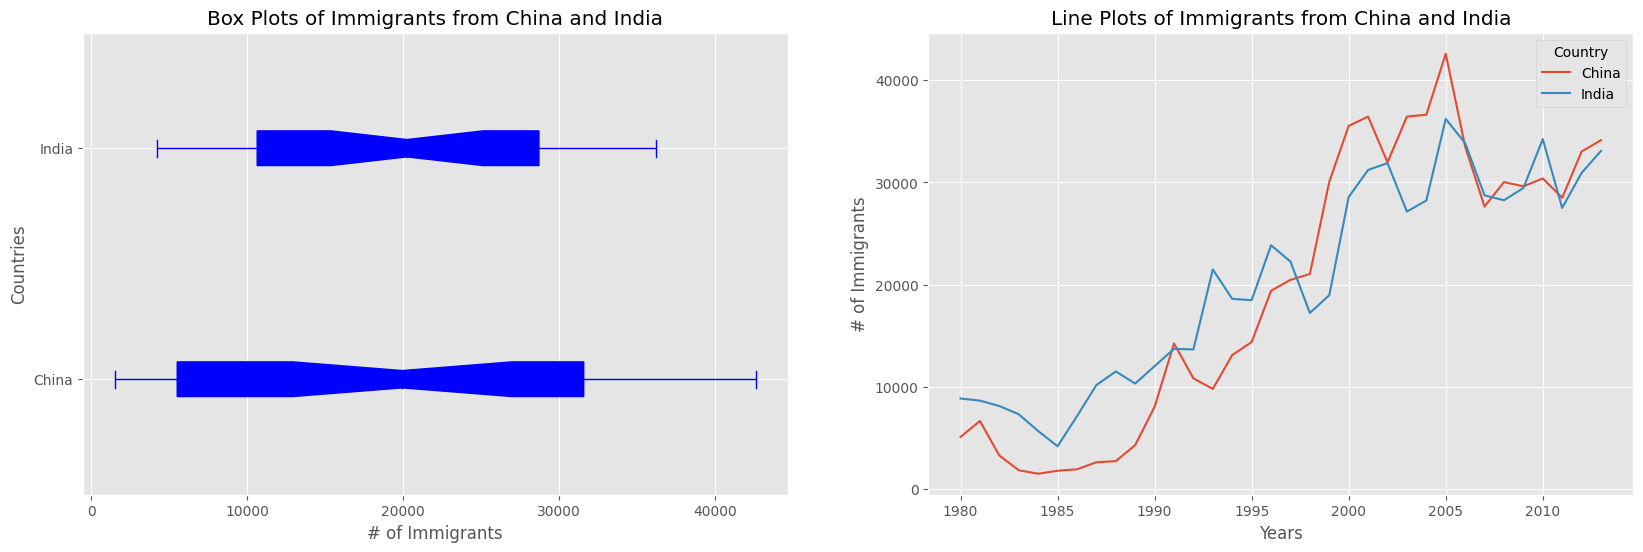

In [ ]:
fig = plt.figure() # create a figure
ax0 = fig.add_subplot(1,2,1) # subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # subplot 2 (1 row, 2 columns, second plot)

# Subplot 1 - Box Plot
df_ci.plot(kind='box',
           color='blue',
           notch=True,
           patch_artist=True,
           vert=False,
           figsize=(20,6),
           ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India')
ax0.set_xlabel('# of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2 - Line Plot
df_ci.plot(kind='line',
           figsize=(20,6),
           ax=ax1)
ax1.set_title('Line Plots of Immigrants from China and India')
ax1.set_xlabel('Years')
ax1.set_ylabel('# of Immigrants')

plt.show()

#### Ex) Box Plot Visualization for the distribution of the Top 15 Countries Grouped by the Decades

In [ ]:
# Re-order the dataset and get the top 15 countries based on Total
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)

In [ ]:
# create the list of all years in each decades
year_80s = list(map(str,range(1980,1990)))
year_90s = list(map(str,range(1990,2000)))
year_00s = list(map(str,range(2000,2010)))

In [ ]:
# slice the df_can to create a series for each decades
df_80s = df_top15.loc[:,year_80s].sum(axis=1)
df_90s = df_top15.loc[:,year_90s].sum(axis=1)
df_00s = df_top15.loc[:,year_00s].sum(axis=1)

In [ ]:
# Combine all three series and create a new Data Frame
df_decades = pd.DataFrame({'1980s':df_80s,'1990s':df_90s,'2000s':df_00s})
df_decades

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


<AxesSubplot: >

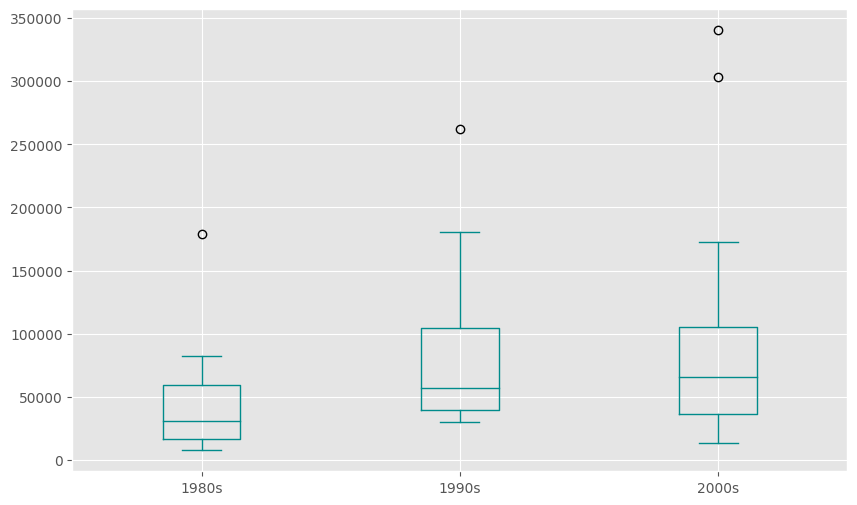

In [ ]:
# Box Plot
df_decades.plot(kind='box',figsize=(10,6),color='darkcyan')

**Use Artist Layer to modify the above boxplot with some customizations:**

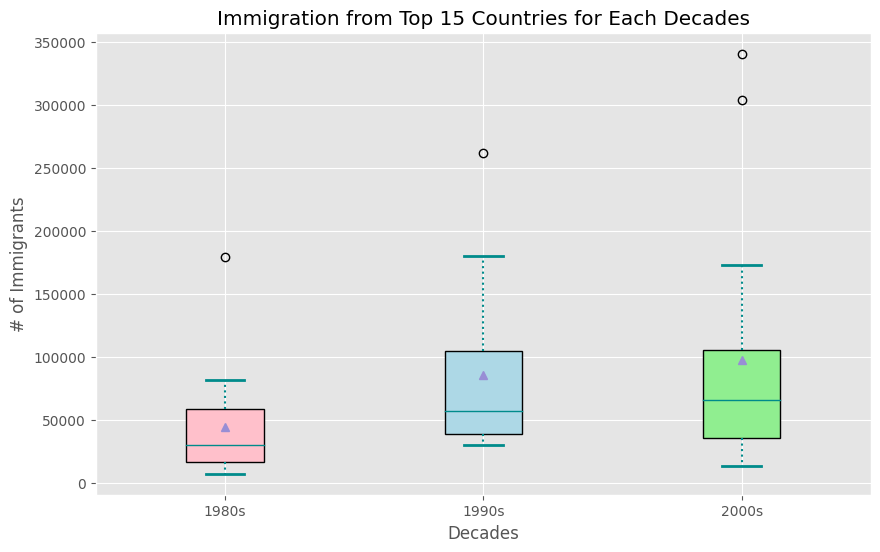

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# create axes instance
box = ax.boxplot(df_decades,
                 patch_artist=True,
                 showmeans=True)
# set box colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(box['boxes'],colors):
    patch.set_facecolor(color)

# set whiskers
for whisker in box['whiskers']:
    whisker.set(color ='#008B8B',
                linewidth = 1.5,
                linestyle =":")

# set caps
for cap in box['caps']:
    cap.set(color ='#008B8B',
            linewidth = 2)

# set medians
for median in box['medians']:
    median.set(color ='#008B8B',
               linewidth = 1)

# change x tick labels
ax.set_xticklabels(['1980s','1990s','2000s'])

ax.set_xlabel('Decades')
ax.set_ylabel('# of Immigrants')
ax.set_title('Immigration from Top 15 Countries for Each Decades')

plt.show()

#### Outliers

The Outlier Requirement 
*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

In [ ]:
df_decades.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


* IQR = 105,505.5 - 36,101.5 = 69,404 
* Outlier = 105,505.5 + (1.5 \* 69,404) = 209,611.5

In [ ]:
# Outliers for 2000s
df_decades_2 = df_decades.reset_index()
df_decades_2[df_decades_2['2000s'] > 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


## Plot Type: Scatter Plots

**EX) Using a Scatter Plot, visualize the trend of total immigration to Canada for the years between 1980-2013.**

* Scatter plot of the relationship between `years` and `total population`

In [ ]:
# dataframe for the total population per year
df_sct = pd.DataFrame(df_can[years].sum(axis=0))
df_sct.head()


,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [ ]:
# convert years to type int
df_sct.index = map(int,df_sct.index)
# reset the index to put in back in as a column in the dataframe
df_sct.reset_index(inplace=True)
# rename columns
df_sct.columns = ['year','total']

Create a Scatter Plot

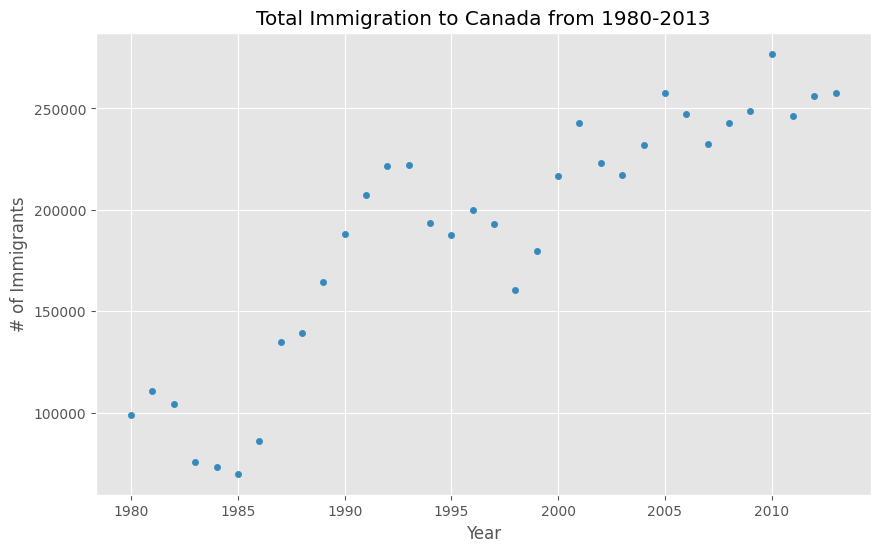

In [ ]:
df_sct.plot(kind='scatter',x='year',y='total',figsize=(10,6))

plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('# of Immigrants')

plt.show()

Fitting the line using `polyfit()`

In [ ]:
x = df_sct['year']
y = df_sct['total']
fit = np.polyfit(x,y,deg=1) # deg=1 is linear
fit

array([ 5.56709228e+03, -1.09261952e+07])

Plot the regression line on the Scatter Plot

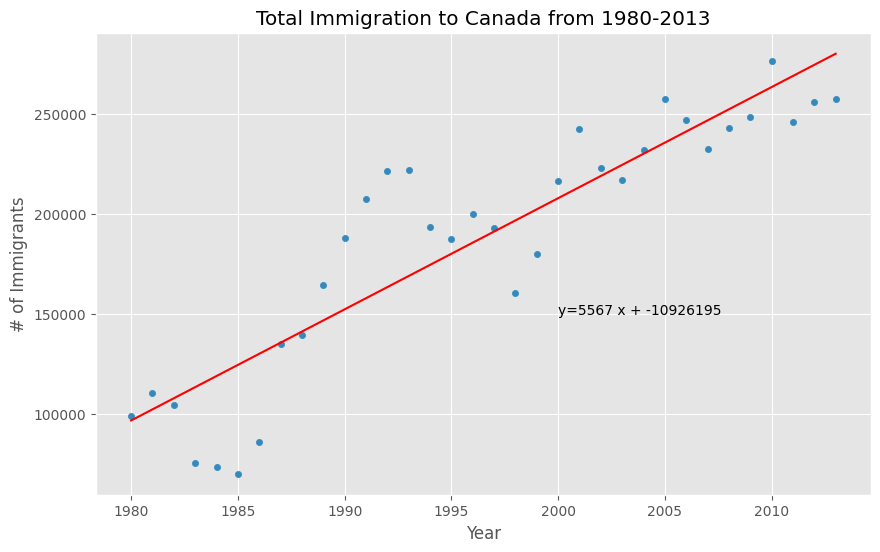

In [ ]:
# Scatter Plot
df_sct.plot(kind='scatter',x='year',y='total',figsize=(10,6))
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('# of Immigrants')

# Line Plot of Best Fit
plt.plot(x, fit[0]*x+fit[1],color='red')
# annotate equation
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()


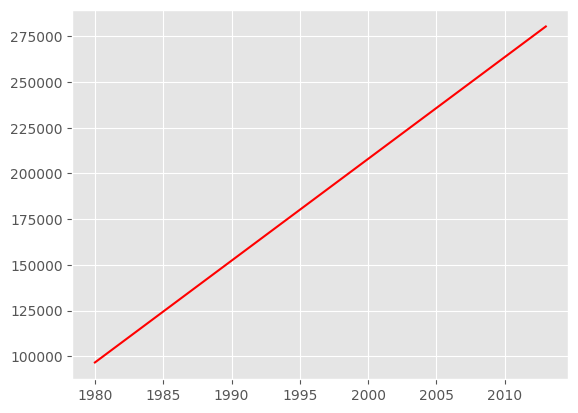

In [ ]:
plt.plot(x, fit[0]*x+fit[1],color='red')

EX) Create the total immigration from Denmark, Norway and Sweden to Canada.

1. Create a new data frame for three countries, and transpose.

In [ ]:
df_dnw = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()

In [ ]:
df_dnw.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


2. Sum the # of immigration across the three countries, and save it into the data frame.

In [ ]:
df_total = pd.DataFrame(df_dnw.sum(axis=1))

3. Reset Index in place

In [ ]:
df_total.reset_index(inplace=True)

4. Rename the columns name.

In [ ]:
df_total.columns = ['year','total']

5. Change `year` from string to int.

In [ ]:
df_total['year']=df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


6. Create a Scatter Plot

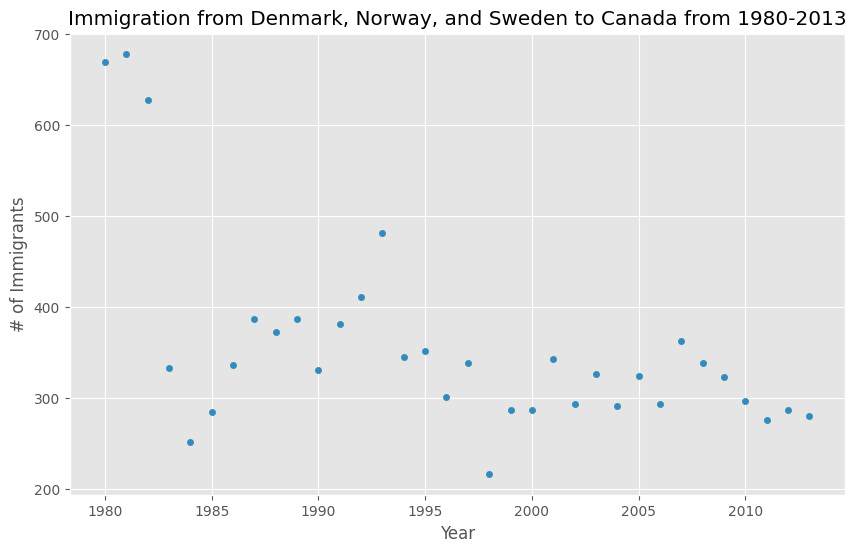

In [ ]:
df_total.plot(kind='scatter',x='year',y='total',figsize=(10,6))

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('# of Immigrants')

plt.show()

Scatter Plot (Bubble)

In [ ]:
# extract years columns then transpose to flip x and y
df_can_t = df_can[years].transpose() 
# change index (Years) from str to int
df_can_t.index = map(int,df_can_t.index)
# change index name to Year
df_can_t.index.name = 'Year'
# reset index and put in back as a column
df_can_t.reset_index(inplace=True)
# check the new df
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Min-Max Normalization (feature scaling)

In [ ]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Bubble Plot Brazil and Argentina in one plot using Artist Layer. 


Normalized Weight is in the range of 0-1. 
Multiply the weight parameter by 2000 and add 10 which is for when the weight parameter = 0.

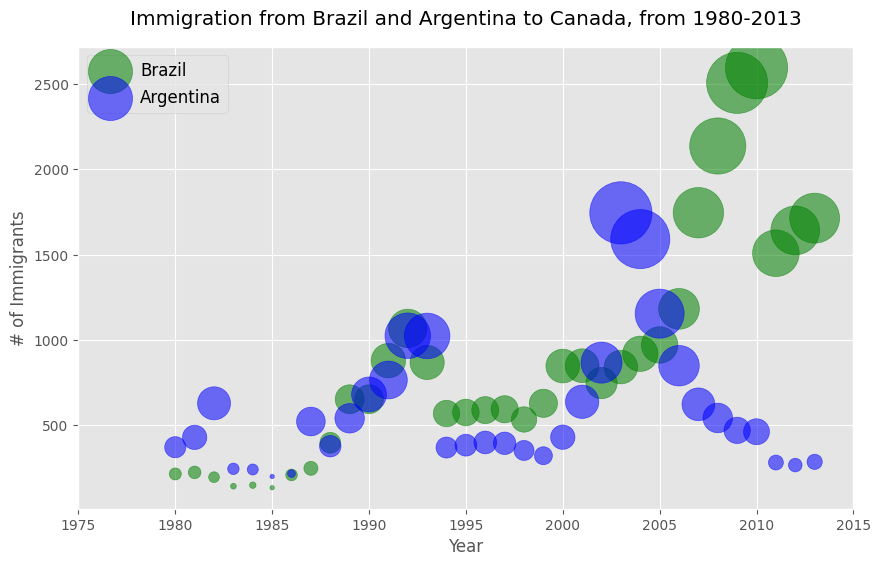

In [ ]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(10,6),
                    s=norm_brazil*2000+10, #weight
                    alpha=0.55, 
                    color='green',
                    xlim=(1975,2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    figsize=(10,6),
                    s=norm_argentina*2000+10, #weight
                    alpha=0.55,
                    color='blue',
                    xlim=(1975,2015),
                    ax=ax0 # add ax1 to ax0 plot
                    )

ax0.set_ylabel('# of Immigrants')
ax0.set_title("Immigration from Brazil and Argentina to Canada, from 1980-2013", y=1.03)
ax0.legend(['Brazil','Argentina'],fontsize='large')     

## Resources
X11 Color Names: https://www.cssportal.com/html-colors/x11-colors.php \
Pyplot Annotation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
